In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager
from matplotlib.pyplot import figure
from IPython.display import display

import matplotlib.transforms as transforms
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Add Thai front to plt
font_path = '/content/drive/MyDrive/Master_Degree/5001/Sarabun-ExtraBold.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Sarabun'

##Import & Prepare Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Master_Degree/5001/combined_v2.csv')

df['prov'] = df['prov'].replace({
    'กรุงเทพฯ': 'กรุงเทพมหานคร',
    #'กรมแพทย์ทหารเรือ': 'กรุงเทพมหานคร',
    #'กรมแพทย์ทหารอากาศ': 'กรุงเทพมหานคร'
})
#display(df.head(3))

pdxG = pd.read_csv('/content/drive/MyDrive/Master_Degree/5001/pdx_master_with_draft_columns.csv')
#display(pdxG.head(3))

pop = pd.read_csv('/content/drive/MyDrive/Master_Degree/5001/DADS5001/n_pop_total.csv')
pop = pop.rename(columns={'yyyymm': 'month_no','province': 'prov'})
#display(pop.head(3))

re = pd.read_csv('/content/drive/MyDrive/Master_Degree/5001/DADS5001/province_region4.csv')
re = re.rename(columns={'ADM1_TH': 'prov'})
#display(re.head(3))

dfg = pd.merge(pdxG,df,  on='pdx', how='outer')
#display(df6.head(3))

dfgr = pd.merge(dfg, re, on='prov',how='outer')
#display(df8.head(3))

rpop = pd.merge(pop, re, on='prov')
#display(apop.head(3))

#OverAll

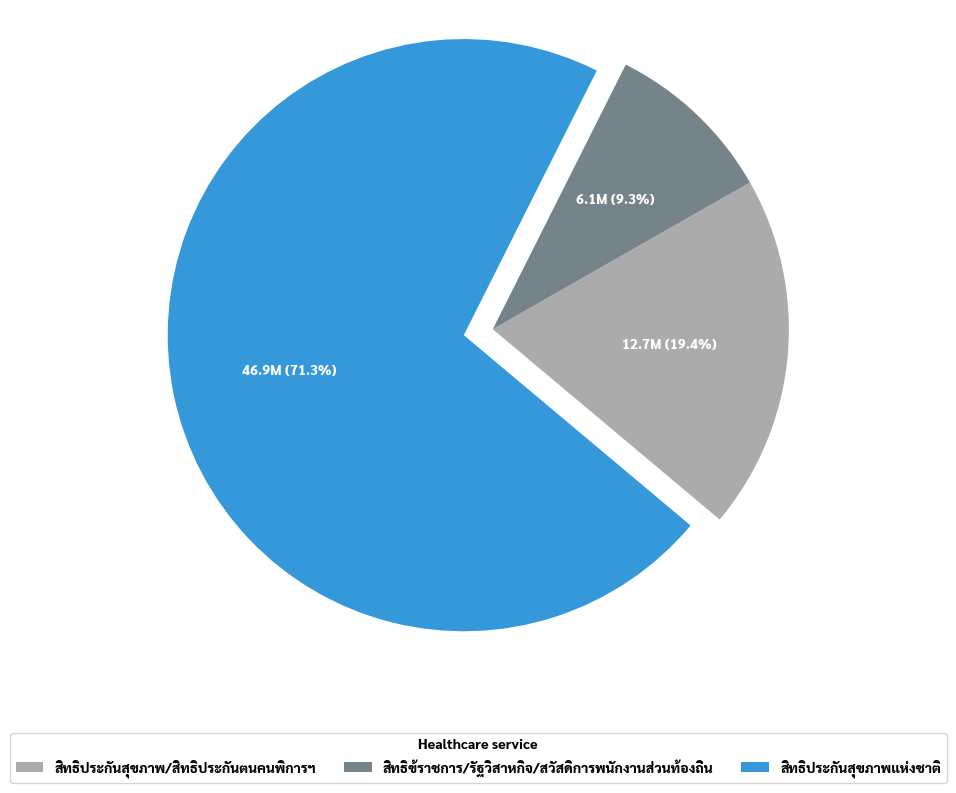

In [188]:
#Chart GPT
# Data
labels = ["สิทธิประกันสุขภาพ/สิทธิประกันตนคนพิการฯ", "สิทธิข้ราชการ/รัฐวิสาหกิจ/สวัสดิการพนักงานส่วนท้องถิ่น","สิทธิประกันสุขภาพแห่งชาติ"]
values = [ 12732348,6139334,46888435]


# Calculate percentages
perc = [(v / sum(values)) * 100 for v in values]

# Colors
colors = ['#ABABAB', '#75848A', '#3498db']

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Determine which slice is the largest
explode = [0] * len(values)
largest_slice_index = values.index(max(values))
explode[largest_slice_index] = 0.1  # Make the largest slice "pop out"

# Function to format autopct with value in millions
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{val/1000000:.1f}M ({pct:.1f}%)'
    return my_autopct

wedges, texts, autotexts = ax.pie(values, colors=colors, wedgeprops=None, startangle=-40, autopct=autopct_format(values), explode=explode)

# Add data labels
for text, autotext in zip(texts, autotexts):
    text.set_color('grey')
    autotext.set_color('white')
    autotext.set_fontsize(10)


# Title + legend with only labels
plt.legend(
    wedges, labels,
    title="Healthcare service",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=len(labels)  # horizontal legend
)

plt.axis('equal')
plt.tight_layout()
plt.show()

# Overall N_Pop & N_Sevice

In [189]:
sam = df[['prov','gender','n_service','n_pop','pdx','month_no']].groupby('month_no')
gf1=sam[['n_service','n_pop']].agg('sum')
gf1.reset_index(inplace=True)

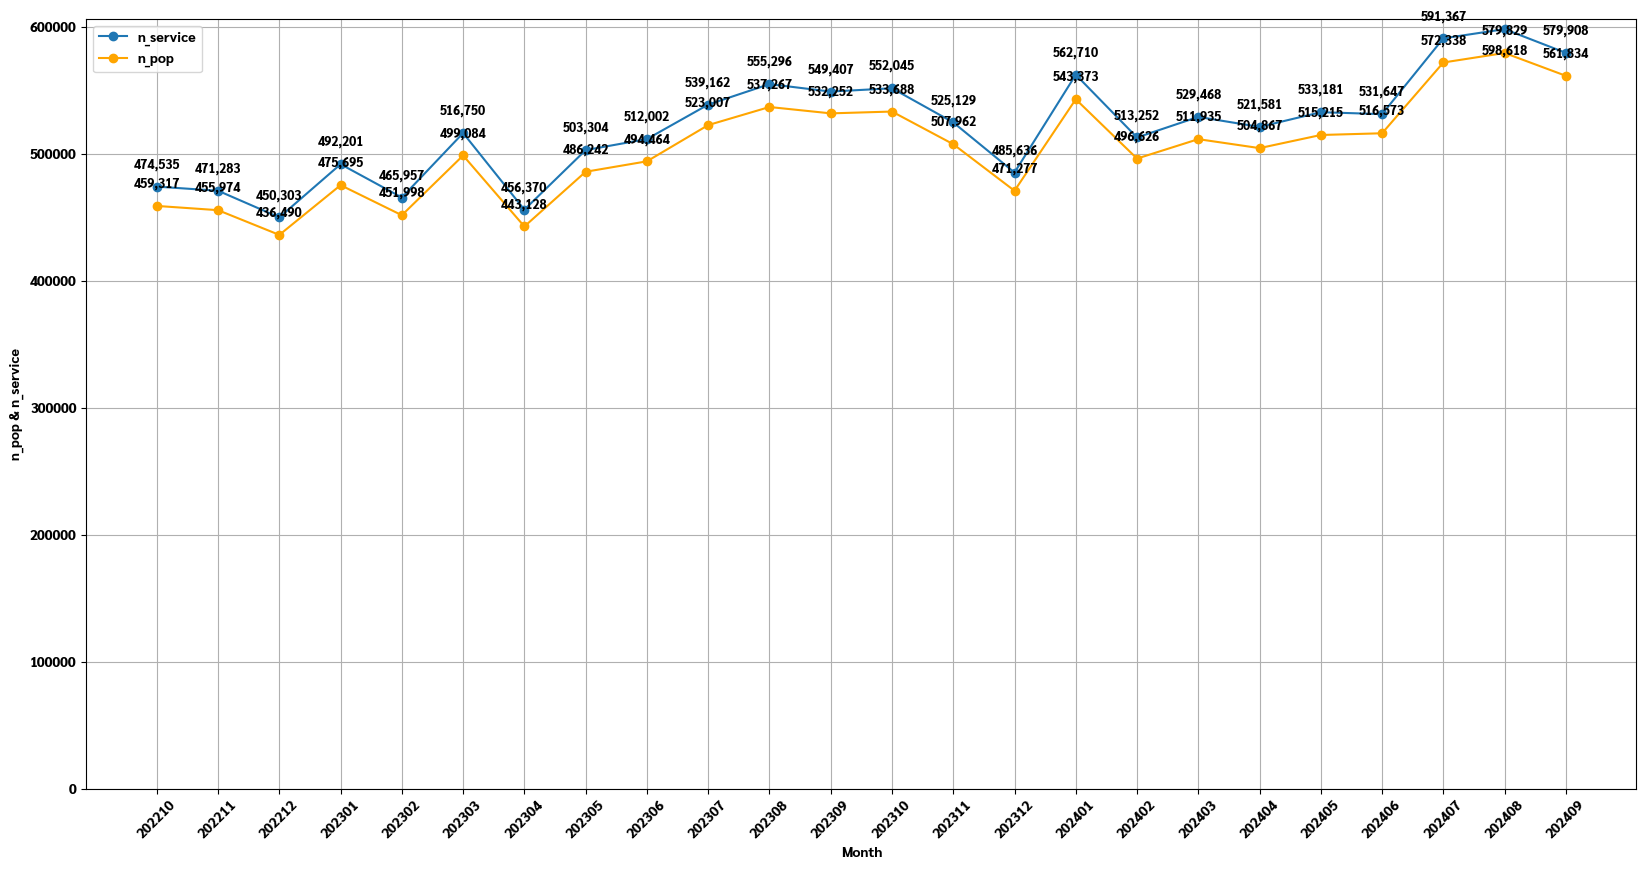

In [190]:
ax1=list(gf1.iloc[:,0])
ay1=list(gf1.iloc[:,1])
ay2=list(gf1.iloc[:,2])

fig, ax = plt.subplots(figsize=(20, 10))

# Plot the data using numerical indices for x-axis
ax.plot(np.arange(len(ax1)), ay1, marker='o', linestyle='-',label='n_service')
ax.plot(np.arange(len(ax1)), ay2, marker='o', linestyle='-',label='n_pop', color='orange')

# Set the x-tick locations to correspond to the indices
ax.set_xticks(np.arange(len(ax1)))
ax.set_xticklabels(ax1)

# Set the lower limit of the y-axis to 0
ax.set_ylim(bottom=0)

# Get Y-axis limits for boundary check
ymin, ymax = ax.get_ylim()
offset = (ymax - ymin) * 0.02  # 2% offset

# Add data labels within the frame
for i, (x_pos, y1, y2) in enumerate(zip(np.arange(len(ax1)), ay1, ay2)):
    # For y1 (blue)
    y1_pos = y1 + offset if y1 + offset < ymax else y1 - offset
    va1 = 'bottom' if y1 + offset < ymax else 'top'
    ax.text(x_pos, y1_pos, f"{y1:,.0f}", ha='center', va=va1, fontsize=9)

    # For y2 (orange)
    y2_pos = y2 + offset if y2 + offset < ymax else y2 - offset
    va2 = 'bottom' if y2 + offset < ymax else 'top'
    ax.text(x_pos, y2_pos, f"{y2:,.0f}", ha='center', va=va2, fontsize=9)

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('n_pop & n_service')
#ax.set_title('n_count/Month & n_service/Month')

# Display the plot
plt.xticks(np.arange(len(ax1)), ax1, rotation=45)
plt.legend()
plt.grid(True)
plt.show()

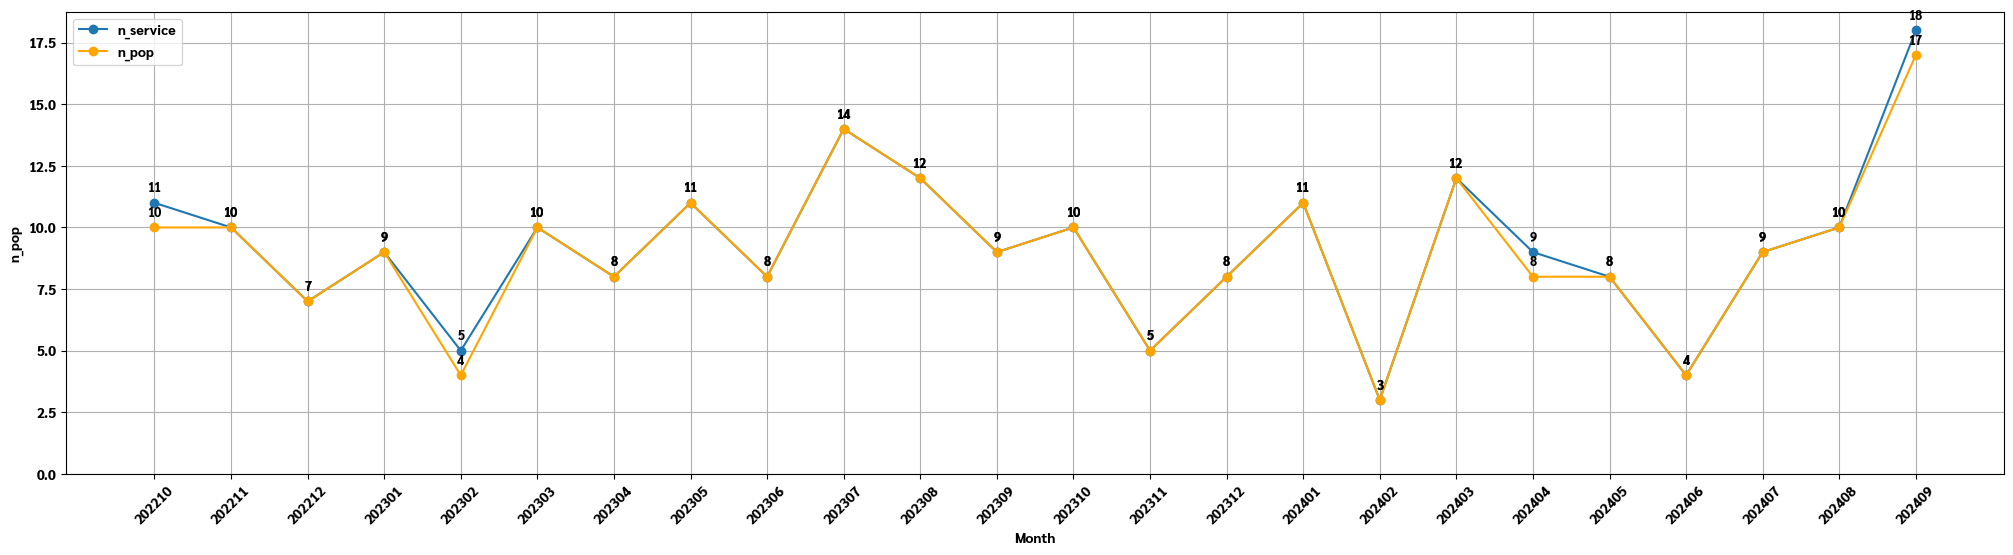

In [191]:
#By Province By Disease

pd_c = 'R00'
prov_c = 'สระบุรี'

sub=df.loc[ (df['pdx'] == pd_c) & (df['prov'] == prov_c) , ['prov','gender','n_service','n_pop','pdx','month_no'] ].groupby('month_no')
#sub.head(3)

gf2=sub[['n_service','n_pop']].agg('sum')
gf2.reset_index(inplace=True)
#gf2

bx1=list(gf2.iloc[:,0])
by1=list(gf2.iloc[:,1])
by2=list(gf2.iloc[:,2])

fig, ax = plt.subplots(figsize=(25, 6))

# Plot the data using numerical indices for x-axis
ax.plot(np.arange(len(bx1)), by1, marker='o', linestyle='-',label='n_service')
ax.plot(np.arange(len(bx1)), by2, marker='o', linestyle='-',label='n_pop', color='orange')

# Set the x-tick locations to correspond to the indices
ax.set_xticks(np.arange(len(bx1)))
ax.set_xticklabels(bx1)

# Get Y-axis limits for boundary check
ymin, ymax = ax.get_ylim()
offset = (ymax - ymin) * 0.02  # 2% offset

# Add data labels within the frame
for i, (x_pos, y1, y2) in enumerate(zip(np.arange(len(bx1)), by1, by2)):
    # For y1 (blue)
    y1_pos = y1 + offset if y1 + offset < ymax else y1 - offset
    va1 = 'bottom' if y1 + offset < ymax else 'top'
    ax.text(x_pos, y1_pos, f"{y1:,.0f}", ha='center', va=va1, fontsize=9)

    # For y2 (orange)
    y2_pos = y2 + offset if y2 + offset < ymax else y2 - offset
    va2 = 'bottom' if y2 + offset < ymax else 'top'
    ax.text(x_pos, y2_pos, f"{y2:,.0f}", ha='center', va=va2, fontsize=9)

# Set the lower limit of the y-axis to 0
ax.set_ylim(bottom=0)


# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('n_pop')
#ax.set_title('n_count/Month')
plt.legend()

# Display the plot
plt.xticks(np.arange(len(bx1)), bx1, rotation=45)
plt.grid(True)
plt.show()

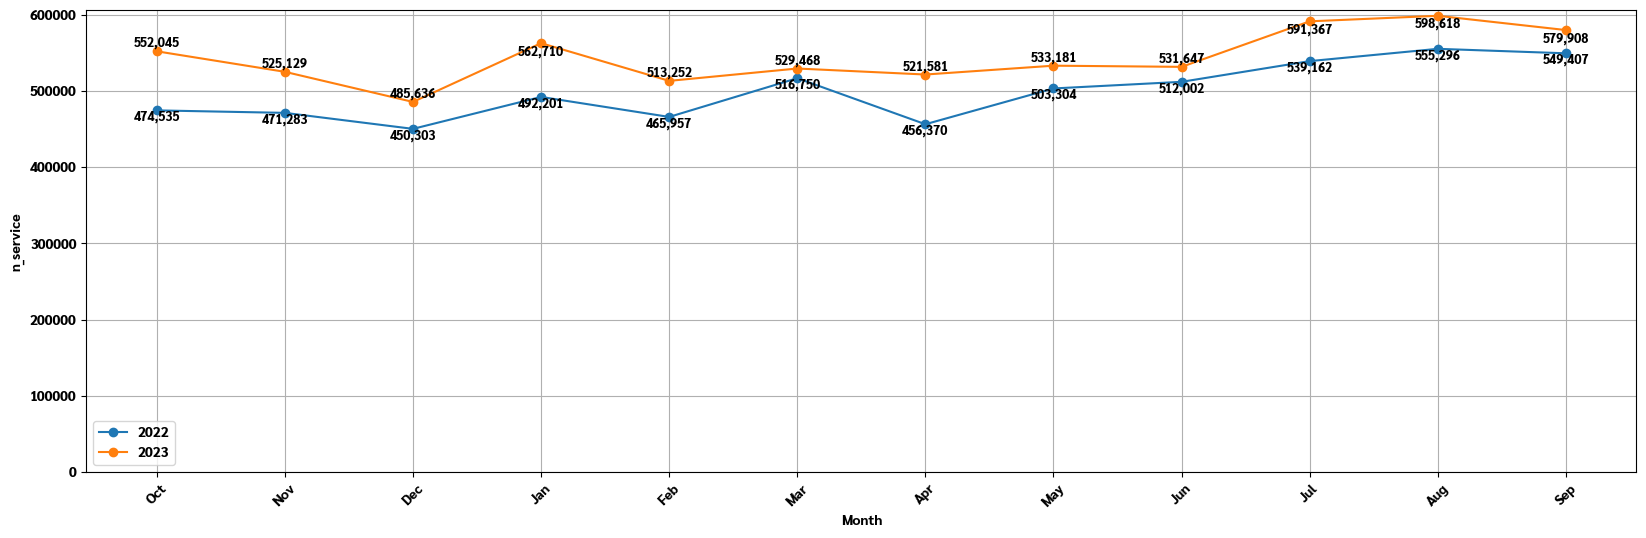

In [192]:
fig, ax = plt.subplots(figsize=(20, 6))

mn=['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
yn=[2022,2023]
ln=0

for i in range(2022,2024):
  st = i*100+10
  en = (i+1)*100+9

  year=df.loc[ (df['month_no'] >= st)&(df['month_no'] <= en) , ['prov','gender','n_service','n_pop','pdx','month_no'] ].groupby('month_no')
  yf1=year[['n_service','n_pop']].agg('sum')
  yf1.reset_index(inplace=True)

  yx1=list(yf1.iloc[:,0])
  yy1=list(yf1.iloc[:,1])
  #yy2=list(yf1.iloc[:,2])

  # Get Y-axis limits for boundary check
  ymin, ymax = ax.get_ylim()
  offset = (ymax - ymin) * 0.02  # 2% offset

  # Add data labels within the frame
  for j, (x_pos, y1) in enumerate(zip(np.arange(len(yx1)), yy1)):
    # For y1 (blue)
    y1_pos = y1 + offset if y1 + offset < ymax else y1 - offset
    va1 = 'bottom' if y1 + offset < ymax else 'top'
    ax.text(x_pos, y1_pos, f"{y1:,.0f}", ha='center', va=va1, fontsize=9)


  ax.plot(np.arange(len(yx1)), yy1, marker='o', linestyle='-',label=yn[ln])
  ln=ln+1


  ax.set_xticks(np.arange(len(yx1)))
  ax.set_xticklabels(yx1)

  ax.set_xlabel('Month')
  ax.set_ylabel('n_service')
  #ax.set_title('n_service/Month')

  plt.xticks(np.arange(len(mn)), mn, rotation=45)
  plt.grid(True)

# Set the lower limit of the y-axis to 0
ax.set_ylim(bottom=0)

plt.legend()
plt.show()

#Region Overall

In [ ]:
# Cal case by Region
case_by_re_m = dfgr[['prov','gender','n_service','n_pop','pdx','month_no','REGION4']].groupby(['REGION4','month_no'])
case_by_re_m = case_by_re_m[['n_pop','n_service']].agg('sum')

case_by_re_m.reset_index(inplace=True)

case_by_re_m_avg = case_by_re_m[['month_no','n_service','n_pop','REGION4']].groupby('REGION4')
case_by_re_m_avg = case_by_re_m_avg[['n_pop','n_service']].agg('mean')

case_by_re_m_avg.reset_index(inplace=True)

#display(df4.head(5))

In [ ]:
#Select Pre Post
post = dfgr.loc[ dfgr['month_no'] == 202409 , ['prov','gender','n_service','n_pop','pdx','month_no','REGION4'] ].groupby('REGION4')
post = post[['n_service']].agg('sum')
post.reset_index(inplace=True)
post = post.rename(columns={'n_service': 'n_service_post'})

pre=dfgr.loc[ dfgr['month_no'] == 202210 , ['prov','gender','n_service','n_pop','pdx','month_no','REGION4'] ].groupby('REGION4')
pre = pre[['n_service']].agg('sum')
pre.reset_index(inplace=True)
pre = pre.rename(columns={'n_service': 'n_service_pre'})

#Cal case Growth
growth_case_r = pd.merge(post, pre, on='REGION4')
growth_case_r['%growth'] = (growth_case_r['n_service_post']/growth_case_r['n_service_pre'])-1
growth_case_r = growth_case_r.drop(columns=['n_service_post','n_service_pre'])

#display(growth_case_r.head(5))

In [ ]:
# Cal pop by Region
pop_by_r_m = rpop[['prov','month_no','male','female','total_pop','REGION4']].groupby(['REGION4','month_no'])
pop_by_r_m = pop_by_r_m[['total_pop']].agg('sum')


pop_by_r_m.reset_index(inplace=True)

pop_by_r_m_avg = pop_by_r_m[['month_no','total_pop','REGION4']].groupby('REGION4')
pop_by_r_m_avg = pop_by_r_m_avg[['total_pop']].agg('mean')

pop_by_r_m_avg.reset_index(inplace=True)

#display(pop_by_r_m_avg.head(5))

#Cal Hospital admit rate per population Growth by region
tb1 = pd.merge(pop_by_r_m_avg,case_by_re_m_avg, on='REGION4')
tb1['n_Patients/Pop'] = (tb1['n_pop']/tb1['total_pop'])

In [ ]:
# Combine calculated value
tb1 = pd.merge(tb1, growth_case_r, on='REGION4')
tb1 = tb1.drop(columns=['n_pop'])


#Visualize
tb1 = tb1.rename(columns={'total_pop': 'AVG Popoulation','n_service': 'AVG n_service'})

#display(g1.head(5))

tb1.style \
    .format({
        'AVG Popoulation': '{:,.2f}'.format,          # comma-separated integers
        'AVG n_service': '{:,.2f}'.format,          # comma-separated integers
        'n_Patients/Pop': '{:.2%}'.format,   # float with 2 decimals
        '%growth': '{:.2%}'.format                # percentage
    })\
    .bar(subset=['AVG Popoulation'], color='#2F486D') \
    .bar(subset=['AVG n_service'], color='#2F486D') \
    .background_gradient(subset=['n_Patients/Pop'], cmap='Reds')\
    .background_gradient(subset=['%growth'], cmap='Reds')

,REGION4,AVG Popoulation,AVG n_service,n_Patients/Pop,%growth
0,ภาคกลาง,"17,982,018.12","108,521.17",0.58%,19.15%
1,ภาคตะวันออก,"5,196,127.08","35,859.46",0.67%,18.28%
2,ภาคตะวันออกเฉียงเหนือ,"21,722,646.67","198,542.33",0.88%,22.79%
3,ภาคเหนือ,"10,599,720.50","90,928.08",0.83%,20.94%
4,ภาคใต้,"10,542,809.92","87,363.08",0.81%,27.80%


#Disease Growth rate

In [ ]:
# Cal How much each disease group admit
service_by_dise = dfgr[['n_service','n_pop','month_no','ICD10_Chapter']].groupby(['ICD10_Chapter'])
service_by_dise = service_by_dise[['n_service']].agg('sum')

service_by_dise.reset_index(inplace=True)

service_by_dise = service_by_dise.sort_values(by='n_service', ascending=False)
#service_by_dise.head(3)

In [ ]:
#Select Pre Post
post1 = dfgr.loc[ dfgr['month_no'] == 202409 , ['prov','ICD10_Chapter','n_service','n_pop','pdx','month_no'] ].groupby(['ICD10_Chapter'])
post1 = post1[['n_service']].agg('sum')
post1.reset_index(inplace=True)
post1 = post1.rename(columns={'n_service': 'n_service_post1'})


pre1 = dfgr.loc[ dfgr['month_no'] == 202210 , ['prov','ICD10_Chapter','n_service','n_pop','pdx','month_no'] ].groupby(['ICD10_Chapter'])
pre1 = pre1[['n_service']].agg('sum')
pre1.reset_index(inplace=True)
pre1 = pre1.rename(columns={'n_service': 'n_service_pre1'})

#Cal n_service Growth for each disease group
gr1 = pd.merge(post1, pre1, on='ICD10_Chapter',how='inner')
gr1['%growth_ser'] = (gr1['n_service_post1']/gr1['n_service_pre1'])-1
gr1 = gr1.drop(columns=['n_service_post1','n_service_pre1'])

gr1= pd.merge(gr1,service_by_dise,  on='ICD10_Chapter', how='outer')

#Cal %Service Participaiton of each disease group
total_service = gr1['n_service'].sum()
gr1['%participation_n_service'] = gr1['n_service'] / total_service


In [ ]:
#Visualize
gr1 = gr1[['ICD10_Chapter','n_service','%participation_n_service','%growth_ser']]

gr1 = gr1.sort_values(by='%participation_n_service', ascending=False)
#display(gr1.head(5))

gr1.style \
    .format({
        'n_service': '{:,.2f}'.format,
        '%participation_n_service': '{:,.2%}'.format,
        '%growth_ser': '{:.2%}'.format
    })\
    .bar(subset=['n_service'], color='#2F486D') \
    .bar(subset=['%participation_n_service'], color='#2F486D') \
    .bar(subset=['%growth_ser'], color='#2F486D')

,ICD10_Chapter,n_service,%participation_n_service,%growth_ser
9,J00-J99: Respiratory system,"1,900,520.00",15.19%,37.33%
0,A00-B99: Certain infectious and parasitic diseases,"1,256,355.00",10.04%,32.81%
8,I00-I99: Circulatory system,"1,168,728.00",9.34%,18.67%
10,K00-K95: Digestive system,"1,072,251.00",8.57%,15.62%
19,S00-T98: Injury and poisoning,"1,052,237.00",8.41%,7.24%
13,N00-N99: Genitourinary system,"959,401.00",7.67%,19.58%
1,C00-D48: Neoplasms,"893,519.00",7.14%,22.91%
18,R00-R99: Symptoms and abnormal findings,"687,350.00",5.49%,23.01%
14,"O00-O99: Pregnancy, childbirth","683,432.00",5.46%,-9.87%
6,H00-H59: Eye and adnexa,"498,005.00",3.98%,37.68%


#%Propotion of disease group for each region

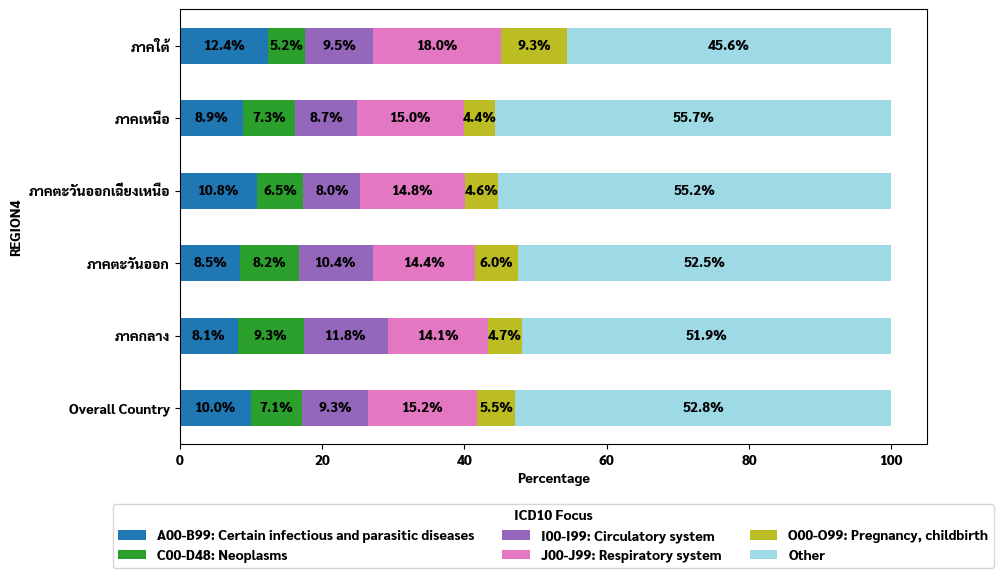

In [ ]:
# Cal case by Region
propo_group = dfgr[['n_service','month_no','REGION4','ICD10_Focus']].groupby(['REGION4','month_no','ICD10_Focus'])
propo_group = propo_group[['n_service']].agg('sum')

propo_group.reset_index(inplace=True)

propo_group = propo_group[['n_service','REGION4','ICD10_Focus']].groupby(['REGION4','ICD10_Focus'])
propo_group = propo_group[['n_service']].agg('mean')

propo_group.reset_index(inplace=True)

# Calculate overall country proportions
overall_country = dfgr[['n_service','month_no','ICD10_Focus']].groupby(['month_no','ICD10_Focus'])
overall_country = overall_country[['n_service']].agg('sum')
overall_country.reset_index(inplace=True)
overall_country = overall_country[['n_service','ICD10_Focus']].groupby(['ICD10_Focus'])
overall_country = overall_country[['n_service']].agg('mean')
overall_country.reset_index(inplace=True)
overall_country['REGION4'] = 'Overall Country'

# Concatenate regional and overall data
combined_proportions = pd.concat([propo_group, overall_country])

# Pivot the dataframe to have REGION4 as index and ICD10_Chapter as columns
pivot_df = combined_proportions.pivot_table(index='REGION4', columns='ICD10_Focus', values='n_service', aggfunc='sum', fill_value=0)

# Normalize the data to make it 100%
pivot_df_normalized = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot the 100% stacked bar chart (horizontal)
ax = pivot_df_normalized.plot(kind='barh', stacked=True, figsize=(10,6), colormap='tab20')

# Adding labels and title
ax.set_xlabel('Percentage')
#ax.set_title('100% Stacked Bar Chart of Services by ICD10 Focus and Region')
ax.legend(title='ICD10 Focus', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3) # Adjusted bbox_to_anchor

# Add percentage labels inside the bars
for p in ax.patches:
    width = p.get_width()  # Get the width of each segment (which represents the percentage)
    if width > 0:  # Avoid division by zero
        ax.text(p.get_x() + width / 2, p.get_y() + p.get_height() / 2, f'{width:.1f}%',
                ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin to make space for the legend
plt.show()

#Top 5 Disease of each region

#%Propotion of Preventable disease for each region

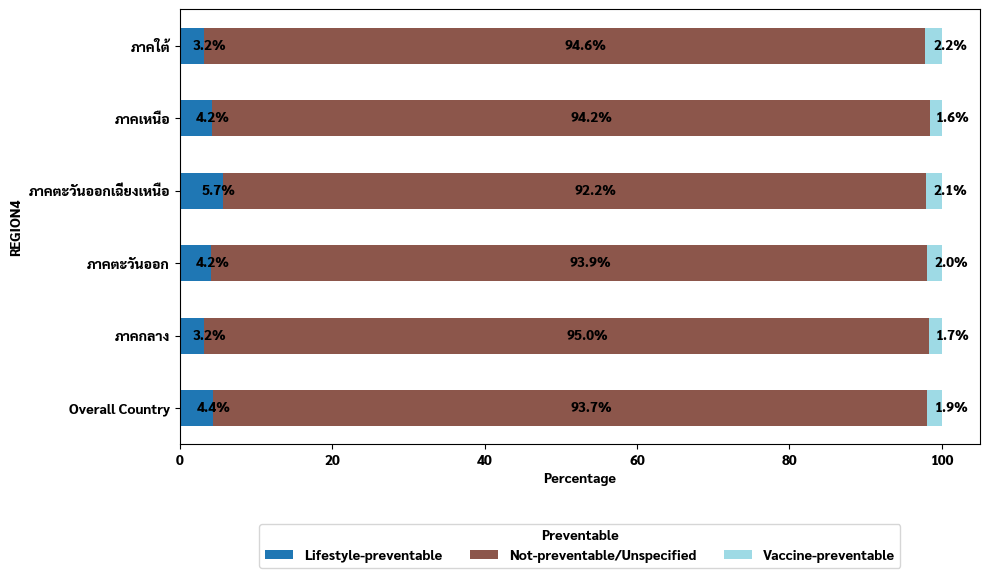

In [ ]:
# Cal case by Region
propo_group = dfgr[['n_service','month_no','REGION4','Preventable']].groupby(['REGION4','month_no','Preventable'])
propo_group = propo_group[['n_service']].agg('sum')

propo_group.reset_index(inplace=True)

propo_group = propo_group[['n_service','REGION4','Preventable']].groupby(['REGION4','Preventable'])
propo_group = propo_group[['n_service']].agg('mean')

propo_group.reset_index(inplace=True)

# Calculate overall country proportions
overall_country = dfgr[['n_service','month_no','Preventable']].groupby(['month_no','Preventable'])
overall_country = overall_country[['n_service']].agg('sum')
overall_country.reset_index(inplace=True)
overall_country = overall_country[['n_service','Preventable']].groupby(['Preventable'])
overall_country = overall_country[['n_service']].agg('mean')
overall_country.reset_index(inplace=True)
overall_country['REGION4'] = 'Overall Country'

# Concatenate regional and overall data
combined_proportions = pd.concat([propo_group, overall_country])

# Pivot the dataframe to have REGION4 as index and ICD10_Chapter as columns
pivot_df = combined_proportions.pivot_table(index='REGION4', columns='Preventable', values='n_service', aggfunc='sum', fill_value=0)

# Normalize the data to make it 100%
pivot_df_normalized = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot the 100% stacked bar chart (horizontal)
ax = pivot_df_normalized.plot(kind='barh', stacked=True, figsize=(10,6), colormap='tab20')

# Adding labels and title
ax.set_xlabel('Percentage')
#ax.set_title('100% Stacked Bar Chart of Services by ICD10 Focus and Region')
ax.legend(title='Preventable', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3) # Adjusted bbox_to_anchor

# Add percentage labels inside the bars
for p in ax.patches:
    width = p.get_width()  # Get the width of each segment (which represents the percentage)
    if width > 0:  # Avoid division by zero
        ax.text(p.get_x() + width / 2, p.get_y() + p.get_height() / 2, f'{width:.1f}%',
                ha='left', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin to make space for the legend
plt.show()



#%Propotion of Communicable_vs_NCD disease for each region

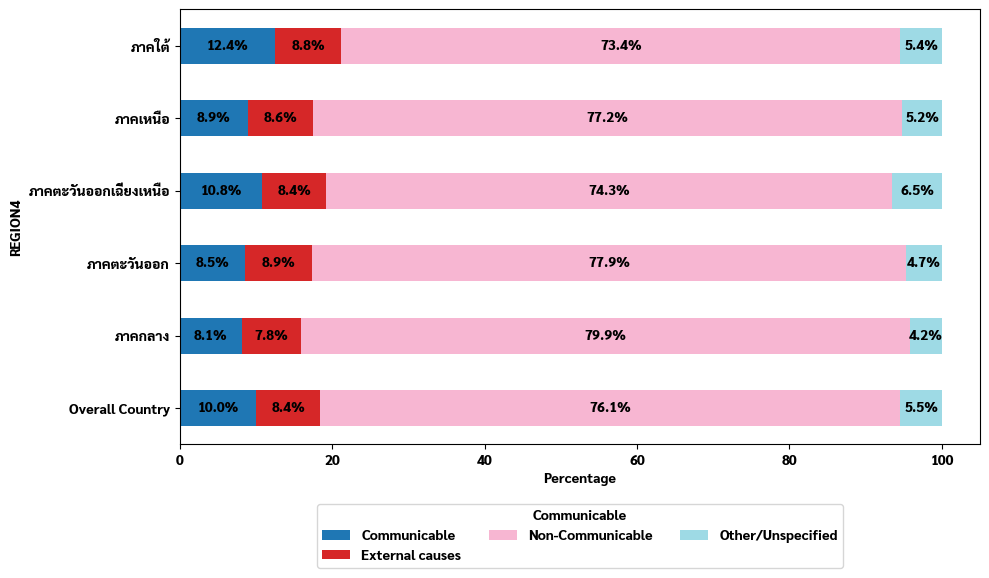

In [ ]:
# Cal case by Region
propo_group = dfgr[['n_service','month_no','REGION4','Communicable_vs_NCD']].groupby(['REGION4','month_no','Communicable_vs_NCD'])
propo_group = propo_group[['n_service']].agg('sum')

propo_group.reset_index(inplace=True)

propo_group = propo_group[['n_service','REGION4','Communicable_vs_NCD']].groupby(['REGION4','Communicable_vs_NCD'])
propo_group = propo_group[['n_service']].agg('mean')

propo_group.reset_index(inplace=True)

# Calculate overall country proportions
overall_country = dfgr[['n_service','month_no','Communicable_vs_NCD']].groupby(['month_no','Communicable_vs_NCD'])
overall_country = overall_country[['n_service']].agg('sum')
overall_country.reset_index(inplace=True)
overall_country = overall_country[['n_service','Communicable_vs_NCD']].groupby(['Communicable_vs_NCD'])
overall_country = overall_country[['n_service']].agg('mean')
overall_country.reset_index(inplace=True)
overall_country['REGION4'] = 'Overall Country'

# Concatenate regional and overall data
combined_proportions = pd.concat([propo_group, overall_country])

# Pivot the dataframe to have REGION4 as index and ICD10_Chapter as columns
pivot_df = combined_proportions.pivot_table(index='REGION4', columns='Communicable_vs_NCD', values='n_service', aggfunc='sum', fill_value=0)

# Normalize the data to make it 100%
pivot_df_normalized = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot the 100% stacked bar chart (horizontal)
ax = pivot_df_normalized.plot(kind='barh', stacked=True, figsize=(10,6), colormap='tab20')

# Adding labels and title
ax.set_xlabel('Percentage')
#ax.set_title('100% Stacked Bar Chart of Services by ICD10 Focus and Region')
ax.legend(title='Communicable', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3) # Adjusted bbox_to_anchor

# Add percentage labels inside the bars
for p in ax.patches:
    width = p.get_width()  # Get the width of each segment (which represents the percentage)
    if width > 0:  # Avoid division by zero
        ax.text(p.get_x() + width / 2, p.get_y() + p.get_height() / 2, f'{width:.1f}%',
                ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin to make space for the legend
plt.show()



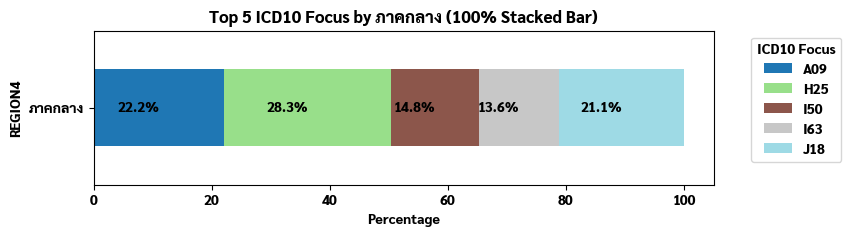

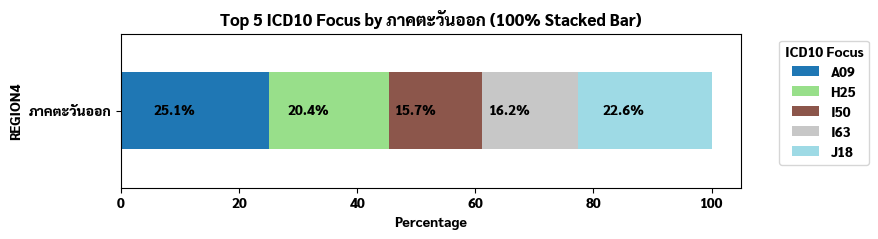

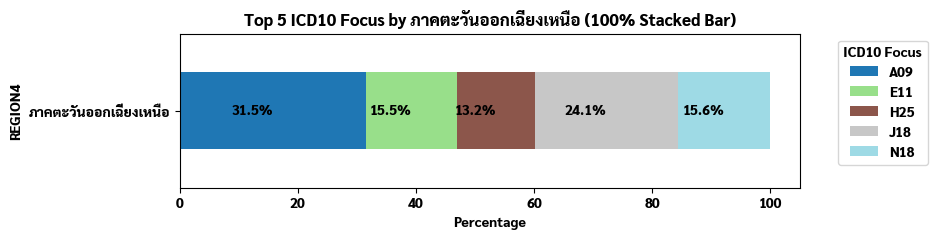

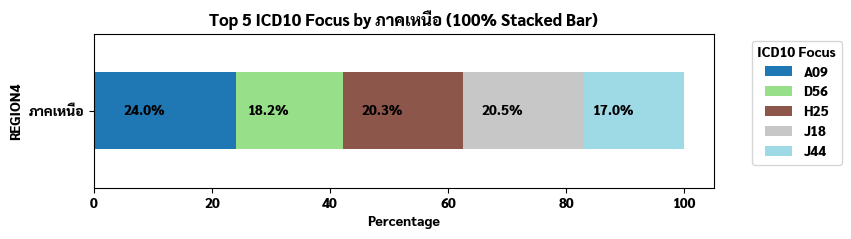

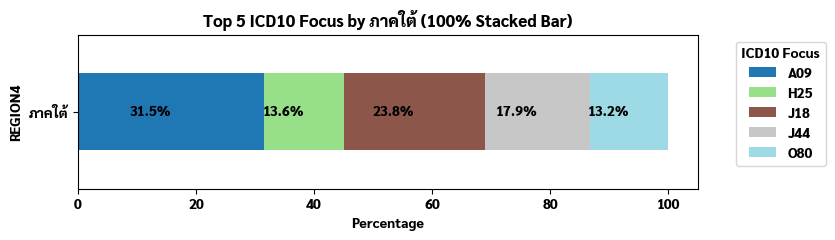

In [ ]:
regions = tb1.iloc[:,0]

for region_name in regions:
    # Filter the data for the specific region
    filtered_df = dfgr[dfgr['REGION4'] == region_name]

    # Aggregate the data by region and pdx to get the total n_service per pdx
    propo_group = filtered_df[['n_service', 'month_no', 'REGION4', 'pdx']].groupby(['REGION4', 'month_no', 'pdx'])
    propo_group = propo_group[['n_service']].agg('sum')

    propo_group.reset_index(inplace=True)

    # Aggregate the n_service by REGION4 and pdx (mean)
    propo_group = propo_group[['n_service', 'REGION4', 'pdx']].groupby(['REGION4', 'pdx'])
    propo_group = propo_group[['n_service']].agg('mean')

    propo_group.reset_index(inplace=True)

    # Calculate the top 5 pdx for the selected region based on total n_service
    top_5_pdx = propo_group.groupby('pdx')['n_service'].sum().sort_values(ascending=False).head(5).index

    # Filter the data to include only the top 5 pdx for the selected region
    filtered_top_5 = propo_group[propo_group['pdx'].isin(top_5_pdx)]

    # Pivot the dataframe to have REGION4 as index and pdx as columns
    pivot_df = filtered_top_5.pivot_table(index='REGION4', columns='pdx', values='n_service', aggfunc='sum', fill_value=0)

    # Normalize the data to make it 100%
    pivot_df_normalized = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

    # Plot the 100% stacked bar chart (horizontal)
    ax = pivot_df_normalized.plot(kind='barh', stacked=True, figsize=(8, 2), colormap='tab20')

    # Adding labels and title
    ax.set_xlabel('Percentage')
    ax.set_title(f'Top 5 ICD10 Focus by {region_name} (100% Stacked Bar)')
    ax.legend(title='ICD10 Focus', loc='upper left', bbox_to_anchor=(1.05, 1), ncol=1)  # Adjusted bbox_to_anchor

    # Add percentage labels inside the bars
    for p in ax.patches:
        width = p.get_width()  # Get the width of each segment (which represents the percentage)
        if width > 0:  # Avoid division by zero
            ax.text(p.get_x() + width / 2, p.get_y() + p.get_height() / 2, f'{width:.1f}%',
                    ha='right', va='center', color='black', fontsize=10)

    plt.show()  # Show the plot for each region


#Disease Growth rate

In [ ]:
# Cal How much each disease group admit
service_by_dise = dfgr[['n_service','Name','n_pop','month_no','pdx']].groupby(['Name'])
service_by_dise = service_by_dise[['n_service']].agg('sum')

service_by_dise.reset_index(inplace=True)

service_by_dise = service_by_dise.sort_values(by='n_service', ascending=False)
#service_by_dise.head(3)

#Select Pre Post
post1 = dfgr.loc[ dfgr['month_no'] == 202409 , ['prov','Name','pdx','n_service','n_pop','month_no'] ].groupby(['Name'])
post1 = post1[['n_service']].agg('sum')
post1.reset_index(inplace=True)
post1 = post1.rename(columns={'n_service': 'n_service_post1'})


pre1 = dfgr.loc[ dfgr['month_no'] == 202210 , ['prov','Name','pdx','n_service','n_pop','month_no'] ].groupby(['Name'])
pre1 = pre1[['n_service']].agg('sum')
pre1.reset_index(inplace=True)
pre1 = pre1.rename(columns={'n_service': 'n_service_pre1'})

#Cal n_service Growth for each disease group
gr1 = pd.merge(post1, pre1, on='Name',how='inner')
gr1['%growth_ser'] = (gr1['n_service_post1']/gr1['n_service_pre1'])-1
gr1 = gr1.drop(columns=['n_service_post1','n_service_pre1'])

gr1= pd.merge(gr1,service_by_dise,  on='Name', how='outer')

#Cal %Service Participaiton of each disease group
total_service = gr1['n_service'].sum()
gr1['%participation_n_service'] = gr1['n_service'] / total_service

#Visualize
gr1 = gr1[['Name','n_service','%participation_n_service','%growth_ser']]

gr1 = gr1.sort_values(by='%participation_n_service', ascending=False)
#display(gr1.head(5))

gr1.style \
    .format({
        'n_service': '{:,.2f}'.format,
        '%participation_n_service': '{:,.2%}'.format,
        '%growth_ser': '{:.2%}'.format
    })\
    .bar(subset=['n_service'], color='#2F486D') \
    .bar(subset=['%participation_n_service'], color='#2F486D') \
    .bar(subset=['%growth_ser'], color='#2F486D')

,Name,n_service,%participation_n_service,%growth_ser
1017,Other gastroenteritis and colitis of infectious and unspecified origin,"595,046.00",4.76%,30.70%
1191,"Pneumonia, organism unspecified","483,891.00",3.87%,28.69%
1322,Senile cataract,"381,254.00",3.05%,39.12%
894,Other chronic obstructive pulmonary disease,"262,244.00",2.10%,3.56%
186,Chronic kidney disease,"261,119.00",2.09%,17.68%
1447,Type 2 diabetes mellitus,"254,872.00",2.04%,45.07%
492,Heart failure,"249,496.00",1.99%,-1.17%
1400,Thalassaemia,"247,997.00",1.98%,19.23%
169,Cerebral infarction,"240,087.00",1.92%,15.44%
37,Acute bronchitis,"228,858.00",1.83%,63.61%


#Population compare to IPUC Service

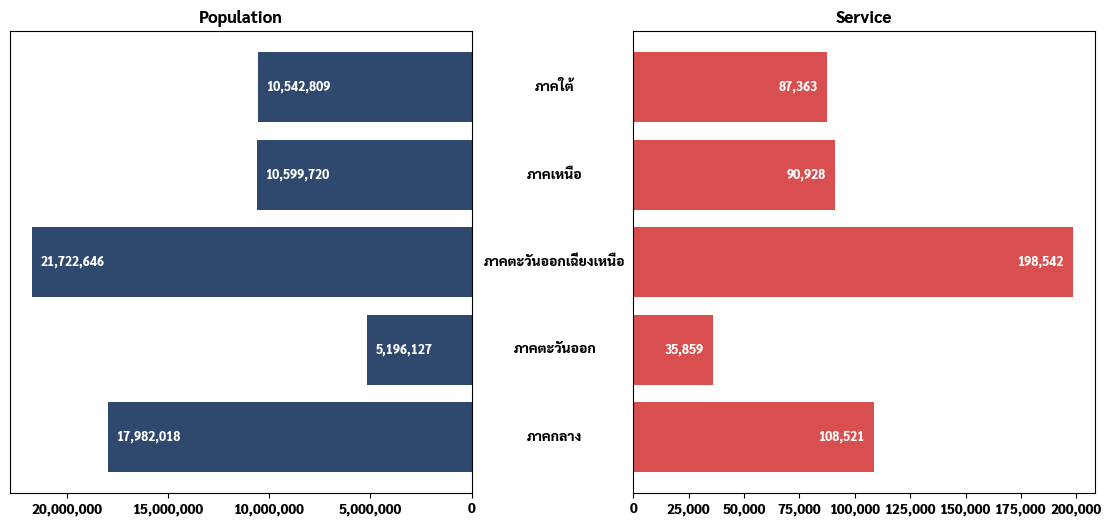

In [ ]:
# Data (assuming tb1 is already defined with the appropriate data)
regions = tb1['REGION4']
pop = tb1['AVG Popoulation']
service = tb1['AVG n_service']

y = np.arange(len(regions))

# Function to format the x-axis labels
def thousand_separator(x, pos):
    return f'{int(x):,}'  # Adds comma as a thousand separator

# Create two subplots side by side, sharing y-axis
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(14, 6), gridspec_kw={'wspace': 0.35})  # Increased wspace

# Left plot (Population)
bars1 = ax1.barh(y, pop, color="#2F486D")
ax1.xaxis.set_major_formatter(FuncFormatter(thousand_separator))
ax1.set(title="Population")
ax1.invert_xaxis()   # mirror effect
ax1.set_yticks(y)    # keep the y-axis ticks for the region names

# Add data labels for Population
for bar in bars1:
    w = bar.get_width()
    ax1.text(w - (0.02 * max(pop)), bar.get_y() + bar.get_height()/2,
             f"{int(w):,}", ha="left", va="center", color="white", fontsize=9)

# Right plot (Service)
bars2 = ax2.barh(y, service, color="#D94F4F")
ax2.xaxis.set_major_formatter(FuncFormatter(thousand_separator))
ax2.set(title="Service")
ax2.set_yticks([])   # hide y-axis labels on the right plot

# Add data labels for Service
for bar in bars2:
    w = bar.get_width()
    ax2.text(w - (0.02 * max(service)), bar.get_y() + bar.get_height()/2,
             f"{int(w):,}", ha="right", va="center", color="white", fontsize=9)

# Add region names exactly on the y-axis (move significantly to the right)
for i, region in enumerate(regions):
    # Move the region names further from the y-axis by increasing the x-coordinate
    ax2.text(ax2.get_xlim()[0] -0.17 * (ax2.get_xlim()[1] - ax2.get_xlim()[0]), bars1[i].get_y() + bars1[i].get_height()/2,
             region, ha="center", va="center", fontsize=10)

plt.tight_layout()
plt.show()